<a href="https://colab.research.google.com/github/Louis5228/Digital-Image-Process/blob/main/Discrete_Fourier_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import os
from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np
import cv2
import math
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Digital Image Process/HW2")

%matplotlib inline

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


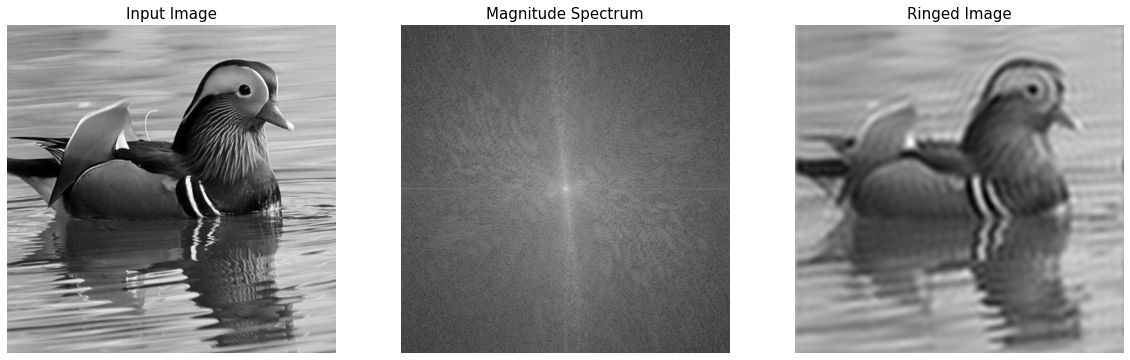

In [138]:
# loaded the image in grayscale
image = cv2.imread('Bird 2.tif',0)

image_float32 = np.float32(image) # convert from uint8 into float32

dft = cv2.dft(image_float32, flags = cv2.DFT_COMPLEX_OUTPUT) # Computed the 2-d discrete Fourier Transform
dft_shift = np.fft.fftshift(dft) # Shift the zero-frequency component to the center of the spectrum.
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])) # compute magnitude spectrum

dft = cv2.dft(image_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = image.shape
crow, ccol = rows//2 , cols//2     # center

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image', fontsize = 15)
plt.axis('off')

plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum', fontsize = 15)
plt.axis('off')

plt.subplot(133)
plt.imshow(img_back, cmap = 'gray')
plt.title('Ringed Image', fontsize = 15)
plt.axis('off')
plt.show()

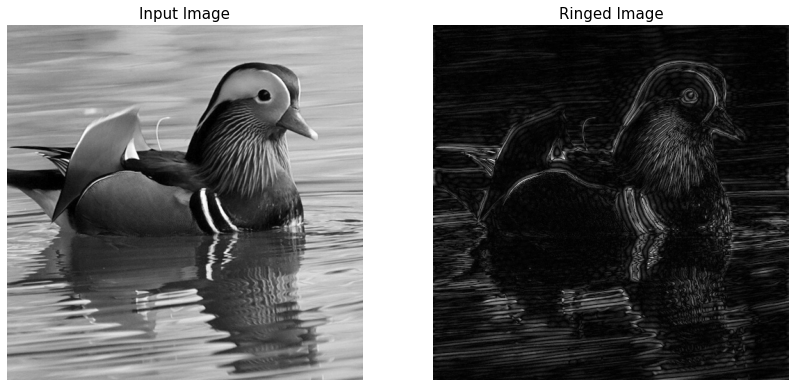

In [139]:
# create a mask first, center square is 0, remaining all ones
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.figure(figsize=(14,9))
plt.subplot(121)
plt.imshow(image_highpass, cmap = 'gray')
plt.title('Input Image', fontsize = 15)
plt.axis('off')

plt.subplot(122)
plt.imshow(img_back, cmap = 'gray')
plt.title('Ringed Image', fontsize = 15)
plt.axis('off')
plt.show()

In [140]:
arr_list = []
arr = magnitude_spectrum[:512, :256]
for i in range(256):
  for j in range(512):
    n = [arr[j][i], j, i]
    arr_list.append(n)
arr_list.sort(reverse = True)
print("[value,     u,   v]")
for i in range(25):
  print(arr_list[i])

[value,     u,   v]
[300.5085, 256, 254]
[299.283, 256, 255]
[289.26358, 255, 255]
[287.65848, 257, 255]
[282.8861, 257, 254]
[281.48758, 253, 255]
[278.69717, 259, 254]
[275.6128, 258, 255]
[272.10452, 259, 255]
[268.75012, 253, 254]
[268.62274, 256, 253]
[267.57715, 258, 252]
[267.1798, 254, 254]
[266.6424, 258, 253]
[265.8584, 252, 253]
[265.40668, 248, 255]
[264.16266, 254, 255]
[264.0195, 254, 252]
[263.40283, 260, 254]
[263.37115, 262, 255]
[262.75793, 254, 253]
[261.8376, 255, 252]
[261.51242, 255, 254]
[260.74612, 252, 255]
[260.26202, 261, 254]


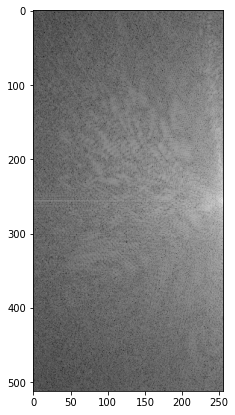

In [141]:
plt.figure(figsize=(10,7))
plt.imshow(magnitude_spectrum[:512, :256], cmap = 'gray')
plt.show()